<a href="https://colab.research.google.com/github/Jay21-bot/chessboard_analyser/blob/main/Chessboard_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 AI Chessboard Analysis Project
This notebook analyzes a chessboard image and counts the number of black and white squares using computer vision.


In [35]:
# Step 1: Install and import libraries
!pip install opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files


In [37]:
# Step 2: Upload image
uploaded = files.upload()


Saving chess-board-B9FNY8.jpg to chess-board-B9FNY8.jpg
Saving chess-game-DDGPFE.jpg to chess-game-DDGPFE.jpg
Saving OIP (1).jpg to OIP (1) (1).jpg
Saving OIP (2).jpg to OIP (2) (1).jpg
Saving OIP.jpg to OIP (5).jpg
Saving red-white-checkered-tile-with-red-white-pattern_1325814-8900.jpg to red-white-checkered-tile-with-red-white-pattern_1325814-8900 (7).jpg


In [ ]:
# Step 3: Helper to get nearest color name
def get_color_name(b, g, r):
    colors = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "orange": (255, 165, 0),
        "purple": (128, 0, 128),
        "pink": (255, 192, 203),
        "white": (255, 255, 255),
        "black": (0, 0, 0),
        "gray": (128, 128, 128),
        "brown": (139, 69, 19),
        "cyan": (0, 255, 255)
    }

    min_dist = float("inf")
    closest_color = "unknown"
    for name, (cb, cg, cr) in colors.items():
        dist = np.sqrt((r - cr) ** 2 + (g - cg) ** 2 + (b - cb) ** 2)
        if dist < min_dist:
            min_dist = dist
            closest_color = name
    return closest_color


In [38]:
# Step 4: Define the ChessboardAnalyzer class
class ChessboardAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.gray = None
        self.blurred = None
        self.thresh = None
        self.black_count = 0
        self.white_count = 0
        self.colors = []

    def preprocess_image(self):
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.blurred = cv2.GaussianBlur(self.gray, (5, 5), 0)
        _, self.thresh = cv2.threshold(self.blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    def detect_squares(self):
        contours, _ = cv2.findContours(self.thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.black_count = 0
        self.white_count = 0
        self.colors = []

        for cnt in contours:
            approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
            if len(approx) == 4 and cv2.contourArea(cnt) > 1000:
                x, y, w, h = cv2.boundingRect(cnt)
                square = self.image[y:y+h, x:x+w]
                mean_val = np.mean(cv2.cvtColor(square, cv2.COLOR_BGR2GRAY))
                avg_color = cv2.mean(square)[:3]
                color_name = get_color_name(*avg_color)
                self.colors.append((avg_color, color_name))

                if mean_val < 128:
                    self.black_count += 1
                    color = (0, 0, 255)
                else:
                    self.white_count += 1
                    color = (0, 255, 0)

                cv2.rectangle(self.image, (x, y), (x + w, y + h), color, 2)
                cv2.putText(self.image, color_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    def show_results(self):
        cv2.putText(self.image, f'Black: {self.black_count} | White: {self.white_count}', (20, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2_imshow(self.image)

        print("\nDetected Box Colors:")
        for i, (bgr, name) in enumerate(self.colors):
            print(f"Box {i+1}: {name} | BGR: {tuple(map(int, bgr))}")


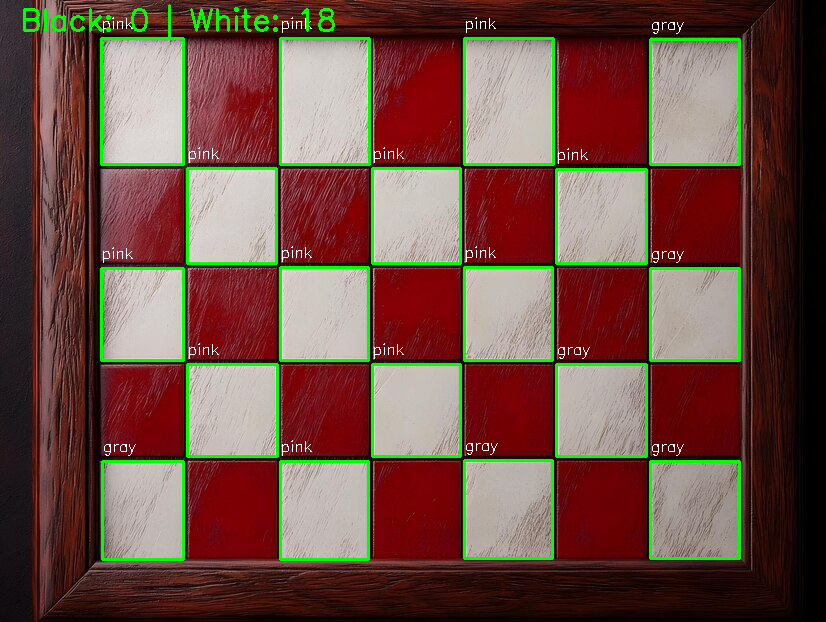


Detected Box Colors:
Box 1: gray | BGR: (138, 144, 156)
Box 2: pink | BGR: (180, 183, 193)
Box 3: gray | BGR: (170, 172, 183)
Box 4: gray | BGR: (159, 166, 176)
Box 5: gray | BGR: (162, 167, 177)
Box 6: pink | BGR: (179, 185, 193)
Box 7: pink | BGR: (185, 189, 198)
Box 8: gray | BGR: (162, 168, 178)
Box 9: pink | BGR: (185, 189, 198)
Box 10: pink | BGR: (172, 179, 188)
Box 11: pink | BGR: (190, 195, 203)
Box 12: pink | BGR: (175, 180, 190)
Box 13: pink | BGR: (187, 192, 200)
Box 14: pink | BGR: (198, 202, 209)
Box 15: gray | BGR: (158, 164, 175)
Box 16: pink | BGR: (179, 185, 193)
Box 17: pink | BGR: (193, 197, 204)
Box 18: pink | BGR: (194, 197, 205)


In [42]:
# Step 5: Run the analyzer on your image
image1_analyzer = ChessboardAnalyzer('red-white-checkered-tile-with-red-white-pattern_1325814-8900.jpg')
image1_analyzer.preprocess_image()
image1_analyzer.detect_squares()
image1_analyzer.show_results()
